<table style="width:100%; border:none;">
  <tr>
    <td style="width:150px; text-align:center; vertical-align:middle;">
      <img src="https://upload.wikimedia.org/wikipedia/en/6/69/Seal_of_Pablo_de_Olavide_University.png" 
           alt="Emblema UPO" 
           style="width:130px; margin:10px;">
    </td>
    <td style="text-align:center; vertical-align:middle;">
      <h2 style="margin-bottom:5px;">Universidad Pablo de Olavide</h2>
      <p><strong>Grado en Ingeniería Informática en Sistemas de Información</strong></p>
      <p><strong>Asignatura: Inteligencia Artificial</strong></p>
      <p><strong>Curso 2025/2026</strong></p>
      <h3 style="margin-top:10px;">TRABAJO #1 – Equipo 08</h3>
      <h4 style="margin-top:5px;">Dataset asignado: Nº 17</h4>
      <p><strong>Integrantes:</strong> María Pérula Gutiérrez &nbsp;·&nbsp; Jonathan Javier Quishpe Maldonado</p>
      <p><strong>Fecha de entrega:</strong> 01/12/2025</p>
    </td>
  </tr>
</table>

<hr style="margin-top:25px; margin-bottom:25px; border: 1px solid #bbb;">
<h2 style="text-align:center;">Regresión Lineal Multivariable - Implementación</h2>

### 1. Importaciones y lectura del dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plotData(X, y):
    plt.scatter(X, y, c="red", marker="x")
    plt.xlabel("Años coche (years)")
    plt.ylabel("Precio actual (current price)")
    plt.title("Datos: years vs current price")
    plt.grid(True, alpha=0.2)
    plt.show()

In [4]:
# Cargamos dataset
df = pd.read_csv("train.csv")

df = df.rename(columns={"current price": "price"})

columnas = ["on road old", "on road now", "km", "rating", "condition",
            "economy", "top speed", "hp", "torque"]

X = df[columnas].copy()
y = df[["price"]].copy()

print("Primeras filas de X:")
print(X.head())
print("\nPrimeras filas de y:")
print(y.head())

Primeras filas de X:
   on road old  on road now      km  rating  condition  economy  top speed  \
0       535651       798186   78945       1          2       14        177   
1       591911       861056  117220       5          9        9        148   
2       686990       770762  132538       2          8       15        181   
3       573999       722381  101065       4          3       11        197   
4       691388       811335   61559       3          9       12        160   

   hp  torque  
0  73     123  
1  74      95  
2  53      97  
3  54     116  
4  53     105  

Primeras filas de y:
      price
0  351318.0
1  285001.5
2  215386.0
3  244295.5
4  531114.5


### 2. Normalización

In [5]:
def featureNormalize(X):
    media = X.mean()
    desv = X.std()
    X_norm = (X - media) / desv
    return X_norm, media, desv

# Normalizamos X
X_norm, media, desv = featureNormalize(X)
print("X normalizada:")
print(X_norm.head())

X normalizada:
   on road old  on road now        km    rating  condition  economy  \
0    -1.129950    -0.016577 -0.731701 -1.417174  -1.271752  1.06476   
1    -0.166714     1.085845  0.581314  1.434283   1.206607 -1.17684   
2     1.461149    -0.497456  1.106794 -0.704310   0.852556  1.51308   
3    -0.473388    -1.345815  0.027120  0.721419  -0.917701 -0.28020   
4     1.536448     0.213990 -1.328124  0.008554   1.206607  0.16812   

   top speed        hp    torque  
0   0.523994 -0.562754  0.929639  
1  -0.979502 -0.514014 -0.399977  
2   0.731373 -1.537559 -0.305004  
3   1.560888 -1.488819  0.597235  
4  -0.357365 -1.537559  0.074886  


### 2. Función de coste multivariable

In [6]:
def computeCostMulti(X, y, theta):
    m = len(y)
    Xn = X.values
    yn = y.values
    h = Xn.dot(theta)
    error = h - yn
    J = (error**2).sum() / (2*m)
    return J

# Añadimos columna de unos
X_norm.insert(0, "ones", 1)

print("Shape de X_norm:", X_norm.shape)

# Inicializar theta
theta = np.zeros((X_norm.shape[1], 1))
theta

J_inicial = computeCostMulti(X_norm, y, theta)
print("Coste inicial:", J_inicial)

Shape de X_norm: (1000, 10)
Coste inicial: 55531656119.12412


### 2. Descenso del gradiente multivariable

In [7]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    Xn = X.values
    yn = y.values
    thetan = theta.copy()
    historial = []

    for i in range(iterations):
        h = Xn.dot(thetan)
        error = h - yn
        grad = (Xn.T.dot(error)) / m
        thetan = thetan - alpha * grad
        J = computeCostMulti(X, y, thetan)
        historial.append(J)

    return thetan, historial

# - Si elegimos alpha demasiado pequeño (0.001), el descenso del gradiente avanza demasiado lento
# - Si elegimos alpha demasiado grande (0.1 o más), el coste puede oscilar o incluso divergir
# 0.03 fue un valor intermedio estable y rápido, igual que usamos en la EPD 2.2
alpha = 0.03

# Con datos normalizados, la gráfica muestra que antes de 150 iteracioes ya ha convergido: En las epd se usan entre 200 y 400 iteraciones
iterations = 300
theta_opt, J_history = gradientDescentMulti(X_norm, y, theta, alpha, iterations)

print("Theta óptimo multivariable:")
print(theta_opt)
print("Coste final:", J_history[-1])

Theta óptimo multivariable:
[[ 3.08487068e+05]
 [ 2.95033728e+04]
 [ 2.85236961e+04]
 [-1.16463258e+05]
 [ 2.47192250e+02]
 [ 1.29400719e+04]
 [-2.59804542e+00]
 [-3.68481959e+02]
 [ 4.21911086e+02]
 [-1.06507051e+02]]
Coste final: 41572736.12372348


### 3. Gráfica de convergencia

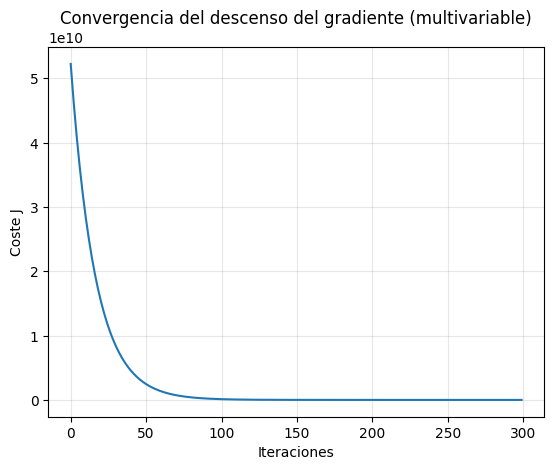

In [8]:
plt.plot(range(len(J_history)), J_history)
plt.xlabel("Iteraciones")
plt.ylabel("Coste J")
plt.title("Convergencia del descenso del gradiente (multivariable)")
plt.grid(True, alpha=0.3)
plt.show()

### 6. Predicciones

In [13]:
#def predice(x, theta):
    #Xp = np.array([1, x])
    #return float(Xp.dot(theta))

def prediceMulti(nuevo, theta, media, desv):
    # Ordenado
    nuevo = np.array(nuevo)
    nuevo_norm = (nuevo - media.values) / desv.values
    nuevo_norm = np.insert(nuevo_norm, 0, 1)  # añadimos el 1 manualmente
    return nuevo_norm.dot(theta)

ejemplo = [600000, 800000, 120000, 3, 4, 10, 180, 110, 90]
pred = prediceMulti(ejemplo, theta_opt, media, desv)
print("Predicción de precio estandar:", pred)

ejemplo_2 = [480000, 600000, 80000, 3, 3, 10, 170, 110, 85]
print("Prediccion de precio estandar:", prediceMulti(ejemplo_2, theta_opt, media, desv))

# Coche nuevo en buen estado
ej1 = [550000, 750000, 30000, 4, 4, 12, 185, 120, 95]
print("Ejemplo buen coche:", prediceMulti(ej1, theta_opt, media, desv))

#Coche viejo en mal estado
ej2 = [200000, 250000, 180000, 1, 1, 7, 150, 80, 70]
print("Ejemplo mal coche:", prediceMulti(ej2, theta_opt, media, desv))

#Coche deportivo (CV y Torque)
ej3 = [700000, 900000, 90000, 5, 4, 9, 220, 200, 180]
print("Ejemplo deportivo:", prediceMulti(ej3, theta_opt, media, desv))

Predicción de precio estandar: [222331.68322383]
Prediccion de precio estandar: [217128.19645837]
Ejemplo buen coche: [531897.81289099]
Ejemplo mal coche: [-508560.74120774]
Ejemplo deportivo: [443703.4425471]


In [10]:
# Conclusión sobre resultados
# Las predicciones para los ejemplos "normales", el coche en buen estado y el deportivo dan precios razonables dentro del rango 
# que vemos en el dataset. Pero, en el caso del coche muy viejo y en mal estado el modelo devuelve un precio negativo, lo cual no tiene sentido en la realidad.

# Esto no indica que el modelo esté mal, es que al ser lineal, para casos muy extremos (coche extremadamente malo)
# se puede ir fuera del rango y mostrar valores no aplicables a la realidad, como precios negativos.

# En un sistema real, habría que limitar el precio mínimo a 0 o usar modelos más avanzados, pero para este trabajo 
# nos sirve el algoritmo y ver que, en general, capta tendencias razonables entre las variables y el precio.

In [14]:
# Funciones de métricas (medir qué tan bien o mal predice nuestro modelo)
def MAE(y_real, y_pred):
    return np.mean(np.abs(y_real - y_pred))

def MSE(y_real, y_pred):
    return np.mean((y_real - y_pred)**2)

def MAPE(y_real, y_pred):
    return np.mean(np.abs((y_real - y_pred) / y_real)) * 100

# Predicciones
X_multi_vals = X_norm.values
y_pred_multi = X_multi_vals.dot(theta_opt)

mae_multi = MAE(y.values, y_pred_multi)
mse_multi = MSE(y.values, y_pred_multi)
mape_multi = MAPE(y.values, y_pred_multi)

print("\nMÉTRICAS REGRESIÓN LINEAL MULTIVARIABLE: ")
print("MAE  :", mae_multi)
print("MSE  :", mse_multi)
print("MAPE :", mape_multi, "%")


MÉTRICAS REGRESIÓN LINEAL MULTIVARIABLE: 
MAE  : 7526.565508794562
MSE  : 83145472.24744695
MAPE : 3.043615930136009 %


In [12]:
# MAE 7.526€
# MSE 83.154.572.000
# MAPE 3.04%

# El modelo solo se equivoca unos 7.500 €, mejor que la regresión lineal univariable.
# MAPE del 3% es que el modelo es bastante preciso.

# Usando más variables (km, condición, hp, rating…) logicamente el modelo mejora mucho.